In [1]:
import sys
sys.path.append('/srv/share3/hagrawal9/project/sokoban/habitat-sim/')
sys.path.append('/srv/share3/hagrawal9/project/sokoban/habitat-api/')

In [2]:
cd ..

/coc/pskynet3/hagrawal9/project/sokoban/habitat-api


In [3]:
import gzip
import math
import magnum as mn
import habitat
from habitat.tasks.sokoban.sokoban_task import SokobanObjectSpec
from habitat_sim.utils.common import (
    d3_40_colors_rgb,
    download_and_unzip,
    quat_from_angle_axis,
)
from habitat_sim.agent import ActionSpec, ActuationSpec

import json
import numpy as np
import os
from habitat.config import Config
from typing import Any, Dict, List, Optional

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
config=habitat.get_config("configs/tasks/sokoban_coda.yaml")

In [5]:
env = habitat.Env(config)

2020-04-24 15:40:25,776 Initializing dataset Sokoban-v0
2020-04-24 15:40:25,782 initializing sim SokobanSim-v0
2020-04-24 15:40:28,689 Initializing task Sokoban-v0


Agent Object ID:  0


In [6]:
obs = env.reset()

Object Lib Id:  1


In [24]:
obs = env.step("MOVE_FORWARD")

In [27]:
obs = env.step("GRAB_RELEASE")

isNav:  True


In [25]:
obs['gripped_object_id'], env.get_metrics()

(-1,
 {'object_distance_to_goal': 4.857199192047119,
  'collisions': {'count': 0, 'is_collision': False}})

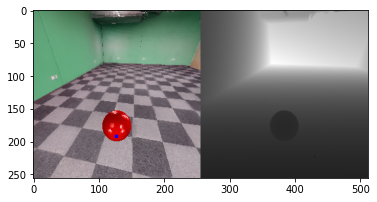

In [28]:
color_obs = obs["rgb"][:, :, :3]
color_obs[190:195, 125:130, :] = [0, 0, 255] 
depth_obs = obs["depth"]
depth_obs = ((depth_obs - np.min(depth_obs))/ np.max(depth_obs) * 255.0).astype(np.int)
depth_obs = np.stack([depth_obs]*3, axis=2)[:, :, :, 0]
plt.imshow(np.concatenate([color_obs, depth_obs], axis=1))

In [ ]:
plt.imsave('task.png', np.concatenate([color_obs, depth_obs], axis=1).astype(np.uint8))